In [1]:
import pandas as pd 
import numpy as np

PerfTreatment = pd.read_csv(r'C:\Users\ijeke\Documents\Datathon\PerfTreatment_subset.csv', parse_dates=['ActivityDate'])

PerfTreatment.info()

print('\n')

PerfTreatment.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44478 entries, 0 to 44477
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         44478 non-null  int64         
 1   EPAssetsId         44478 non-null  int64         
 2   EPAPTId            44478 non-null  int64         
 3   ObservationNumber  44478 non-null  float64       
 4   ActivityDate       44478 non-null  datetime64[ns]
 5   ActivityType       44478 non-null  object        
 6   IntervalTop        44478 non-null  float64       
 7   IntervalBase       44478 non-null  float64       
 8   PerfShots          44478 non-null  float64       
 9   WellHeader.Match   44478 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 3.4+ MB




,Unnamed: 0,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots,WellHeader.Match
0,401,2606177,4546714,2.0,2017-08-29,Perforation,2786.0,2789.0,20.0,Yes
1,5130,2595413,4541001,3.0,2016-10-09,Perforation,2360.5,2364.5,20.0,Yes
2,5131,2591877,4544291,3.0,2016-02-13,Perforation,2374.0,2378.0,20.0,Yes
3,5132,2600921,4544364,3.0,2017-08-11,Perforation,1861.5,1863.5,20.0,Yes
4,5133,2598046,4545252,3.0,2017-01-28,Perforation,2484.0,2485.5,20.0,Yes


In [2]:
## create two separate lists of columns to be dropped
dropcodes= ['WellHeader.Match']

##remove the columns based on lists above, and create new dataframe
PerfTreatment_data = PerfTreatment.drop(columns=(dropcodes), axis=1, inplace=False)

PerfTreatment_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44478 entries, 0 to 44477
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         44478 non-null  int64         
 1   EPAssetsId         44478 non-null  int64         
 2   EPAPTId            44478 non-null  int64         
 3   ObservationNumber  44478 non-null  float64       
 4   ActivityDate       44478 non-null  datetime64[ns]
 5   ActivityType       44478 non-null  object        
 6   IntervalTop        44478 non-null  float64       
 7   IntervalBase       44478 non-null  float64       
 8   PerfShots          44478 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.1+ MB


In [3]:
##check if EPAssetsId is all unique, by counting number of unique values
uniqueEPAssetsId = PerfTreatment_data['EPAssetsId'].nunique()

print('Number of Unique EPAssetsId: ' + str(uniqueEPAssetsId) )

print('\n')

##check if Unamed column 0 is all unique, by counting number of unique values
unique_UnamedColumn0 = PerfTreatment_data.iloc[:, 0].nunique()

print('Number of Unique UnamedColumn0: ' + str(unique_UnamedColumn0) )

Number of Unique EPAssetsId: 1118


Number of Unique UnamedColumn0: 44478


In [4]:
display(PerfTreatment_data.head())

print('\n')

PerfTreatment_data.tail()

,Unnamed: 0,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots
0,401,2606177,4546714,2.0,2017-08-29,Perforation,2786.0,2789.0,20.0
1,5130,2595413,4541001,3.0,2016-10-09,Perforation,2360.5,2364.5,20.0
2,5131,2591877,4544291,3.0,2016-02-13,Perforation,2374.0,2378.0,20.0
3,5132,2600921,4544364,3.0,2017-08-11,Perforation,1861.5,1863.5,20.0
4,5133,2598046,4545252,3.0,2017-01-28,Perforation,2484.0,2485.5,20.0


,Unnamed: 0,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots
44473,444818,2612747,5978165,13.0,2019-09-07,Multi-Stage Fracture,2100.7,2100.8,0.0
44474,444820,2622424,5979903,13.0,2019-11-17,Multi-Stage Fracture,2115.2,2115.3,0.0
44475,444821,2621087,5980826,13.0,2019-09-06,Multi-Stage Fracture,2018.9,2019.0,0.0
44476,444825,2612748,5982327,13.0,2018-08-02,Multi-Stage Fracture,2008.4,2008.5,0.0
44477,444843,2622436,5986290,13.0,2019-12-08,Multi-Stage Fracture,2155.9,2156.0,0.0


In [5]:
## check unique categorical values in the PerfTreatment data - Activity Type
PerfTreatment_data['ActivityType'].unique()


array(['Perforation', 'Hydra Jet Perforation', 'Slotted Liner',
       'Open Hole/Barefoot Completion',
       'Multi-Stage Fracture - Port Closed', 'Cement Squeeze',
       'Bridge Plug - No Cement', 'Chemical Squeeze', 'Acid Treatment',
       'Fracture', 'Multi-Stage Fracture'], dtype=object)

In [6]:
## change ProdType data to categorical dtype

PerfTreatment_data = PerfTreatment_data.astype({'ActivityType': 'category'})

print(PerfTreatment_data.dtypes)

Unnamed: 0                    int64
EPAssetsId                    int64
EPAPTId                       int64
ObservationNumber           float64
ActivityDate         datetime64[ns]
ActivityType               category
IntervalTop                 float64
IntervalBase                float64
PerfShots                   float64
dtype: object


In [7]:
## check summary of the data
PerfTreatment_data.describe()


,Unnamed: 0,EPAssetsId,EPAPTId,ObservationNumber,IntervalTop,IntervalBase,PerfShots
count,44478.000000,4.447800e+04,4.447800e+04,44478.000000,44478.000000,44478.000000,44478.000000
mean,381859.142497,2.607457e+06,4.619244e+06,30.733801,3194.843156,3196.521829,0.041526
std,39781.466511,1.400607e+04,5.318054e+05,30.693810,857.532575,857.283725,0.829812
min,401.000000,2.225574e+06,2.149645e+06,1.000000,75.000000,76.000000,0.000000
25%,347694.250000,2.600418e+06,4.240755e+06,11.000000,2579.300000,2580.800000,0.000000
50%,384544.500000,2.610557e+06,4.582986e+06,21.000000,3085.050000,3086.900000,0.000000
75%,414371.500000,2.616399e+06,4.837399e+06,38.000000,3703.275000,3704.875000,0.000000
max,444843.000000,2.625908e+06,5.986305e+06,177.000000,6953.500000,6953.600000,20.000000


In [8]:
## add year and month column to the PerfTreatment data 

PerfTreatment_data['Year'] = PerfTreatment_data['ActivityDate'].dt.year

PerfTreatment_data['Month'] = PerfTreatment_data['ActivityDate'].dt.month

### Define Key Activity Types: 

#### https://www.glossary.oilfield.slb.com/Terms/p/perforated_interval.aspx  

#### Reservoir sections are perforated at several intervals to prepare the wellbore for production.

#### https://www.onepetro.org/conference-paper/SPE-37110-MS

#### Slotted liner are typically used for sand control to prevent hole collapse within formations, and extensively used in completion of horizontal wells.

#### Open Hole/Barefoot Completion is the simplest completion method.

#### Multi-stage Fracture 

#### Multi-stage Fracture  - Port Closed

#### Hydra Jet Perforation

#### Cement Squeeze

#### Bridge Plug - No Cement 

####  Acid Treatment 

#### Chemical Squeeze

#### Fracture






#### create histogram for PerfShots

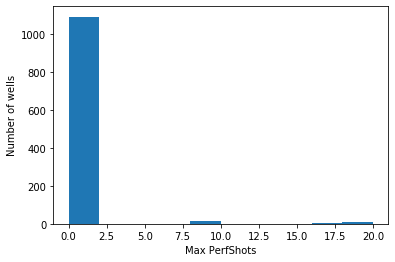

In [9]:
import matplotlib.pyplot as plt

#calculate maximum perfshots per well
max_perfshots_by_well = PerfTreatment_data.groupby('EPAssetsId')['PerfShots'].max()


# plot Histogram for groupby data
max_perfshots_by_well.plot(kind='hist', bins=10)
plt.xlabel('Max PerfShots')
plt.ylabel('Number of wells')

plt.show()

## Review information for an individual well

In [10]:
#create subset of data using parameters EPAssetsId 
EPId = 2600513


perftreatment_foruniquewell = PerfTreatment_data[(PerfTreatment_data['EPAssetsId']==EPId)]

# check head for subset of data
perftreatment_foruniquewell.head()

,Unnamed: 0,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots,Year,Month
19895,378098,2600513,4931633,1.0,2017-03-22,Multi-Stage Fracture,3228.9,3229.0,0.0,2017,3
22518,384828,2600513,4942364,21.0,2017-03-22,Multi-Stage Fracture,1862.5,1862.6,0.0,2017,3
24469,390009,2600513,4942124,20.0,2017-03-22,Multi-Stage Fracture,1922.2,1922.3,0.0,2017,3
25544,392845,2600513,4942119,15.0,2017-03-22,Multi-Stage Fracture,2242.7,2242.8,0.0,2017,3
26605,395710,2600513,4942123,19.0,2017-03-22,Multi-Stage Fracture,1982.8,1982.9,0.0,2017,3


#### summarize information by Well

In [11]:
import matplotlib.pyplot as plt

#calculate maximum intervalbase group by well and activity type
activitytype_by_intervalbase = PerfTreatment_data.groupby(['EPAssetsId', 'ActivityType'], observed=True)['IntervalBase'].max()


activitytype_by_intervalbase.head(10)


EPAssetsId  ActivityType                 
2225574     Open Hole/Barefoot Completion    3734.0
            Multi-Stage Fracture             3704.4
2575232     Open Hole/Barefoot Completion    3502.0
            Multi-Stage Fracture             3476.3
2576573     Open Hole/Barefoot Completion    3865.0
            Multi-Stage Fracture             3835.1
2577895     Multi-Stage Fracture             3186.1
2578937     Open Hole/Barefoot Completion    4300.0
            Acid Treatment                   4278.8
            Multi-Stage Fracture             4278.8
Name: IntervalBase, dtype: float64

In [12]:
import matplotlib.pyplot as plt

#calculate maximum intervalbase group by well and activity type
activitytype_by_epa = PerfTreatment_data.groupby(['EPAssetsId', 'ActivityType'], observed=True)['ActivityType'].count()


activitytype_by_epa.head(10)


EPAssetsId  ActivityType                 
2225574     Open Hole/Barefoot Completion     1
            Multi-Stage Fracture             19
2575232     Open Hole/Barefoot Completion     1
            Multi-Stage Fracture             16
2576573     Open Hole/Barefoot Completion     1
            Multi-Stage Fracture             22
2577895     Multi-Stage Fracture             20
2578937     Open Hole/Barefoot Completion     1
            Acid Treatment                    1
            Multi-Stage Fracture             23
Name: ActivityType, dtype: int64

In [13]:
PerfTreatment_data.to_csv(r'C:\Users\ijeke\Documents\Datathon\Spotfire\Cleaned Data set\PerfTreatment_data.csv')

## Recheck this, might wide format for EDA Feature Engineering

In [14]:
##also replace empty values with zero to indicate no production

PerfTreatment_data_pivot = PerfTreatment_data.pivot_table(index=['EPAssetsId', 'Year', 'Month', 'ActivityDate'], columns='ActivityType', values=['PerfShots', 'IntervalBase', 'IntervalTop'], fill_value=0, observed=True)

PerfTreatment_data_pivot.head()

IntervalBase                          \
ActivityType                       Acid Treatment Bridge Plug - No Cement   
EPAssetsId Year Month ActivityDate                                          
2225574    2015 2     2015-02-11              0.0                     0.0   
2575232    2015 2     2015-02-11              0.0                     0.0   
2576573    2015 9     2015-09-21              0.0                     0.0   
2577895    2015 3     2015-03-03              0.0                     0.0   
2578937    2015 4     2015-04-02              0.0                     0.0   

                                                                             \
ActivityType                       Cement Squeeze Chemical Squeeze Fracture   
EPAssetsId Year Month ActivityDate                                            
2225574    2015 2     2015-02-11              0.0                0      0.0   
2575232    2015 2     2015-02-11              0.0                0      0.0   
2576573    2015 9     2015-09-21              0.0                0      0.0   
2577895    2015 3     2015-03-03              0.0                0      0.0   
2578937    2015 4     2015-04-02              0.0                0      0.0   

                                                                               \
ActivityType                       Hydra Jet Perforation Multi-Stage Fracture   
EPAssetsId Year Month ActivityDate                                              
2225574    2015 2     2015-02-11                     0.0          3173.373684   
2575232    2015 2     2015-02-11                     0.0          2882.843750   
2576573    2015 9     2015-09-21                     0.0          3215.227273   
2577895    2015 3     2015-03-03                     0.0          2616.180000   
2578937    2015 4     2015-04-02                     0.0          3256.326087   

                                                                       \
ActivityType                       Multi-Stage Fracture - Port Closed   
EPAssetsId Year Month ActivityDate                                      
2225574    2015 2     2015-02-11                                  0.0   
2575232    2015 2     2015-02-11                                  0.0   
2576573    2015 9     2015-09-21                                  0.0   
2577895    2015 3     2015-03-03                                  0.0   
2578937    2015 4     2015-04-02                                  0.0   

                                                                              \
ActivityType                       Open Hole/Barefoot Completion Perforation   
EPAssetsId Year Month ActivityDate                                             
2225574    2015 2     2015-02-11                          3734.0         0.0   
2575232    2015 2     2015-02-11                          3502.0         0.0   
2576573    2015 9     2015-09-21                          3865.0         0.0   
2577895    2015 3     2015-03-03                             0.0         0.0   
2578937    2015 4     2015-04-02                          4300.0         0.0   

                                    ...               PerfShots  \
ActivityType                        ... Bridge Plug - No Cement   
EPAssetsId Year Month ActivityDate  ...                           
2225574    2015 2     2015-02-11    ...                       0   
2575232    2015 2     2015-02-11    ...                       0   
2576573    2015 9     2015-09-21    ...                       0   
2577895    2015 3     2015-03-03    ...                       0   
2578937    2015 4     2015-04-02    ...                       0   

                                                                             \
ActivityType                       Cement Squeeze Chemical Squeeze Fracture   
EPAssetsId Year Month ActivityDate                                            
2225574    2015 2     2015-02-11                0                0        0   
2575232    2015 2     2015-02-11                0          